# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]


#Objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected.

Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

* Do the users spend more time on the new landing page than on the existing
landing page?

* Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

* Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

* Is the time spent on the new page the same for the different language users?


#Data Dictionary

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

1.   user_id - Unique user ID of the person visiting the website
2.   group - Whether the user belongs to the first group (control) or the second group (treatment)
3. landing_page - Whether the landing page is new or old
4. time_spent_on_the_page - Time (in minutes) spent by the user on the landing page
5. converted - Whether the user gets converted to a subscriber of the news portal or not
6. language_preferred - Language chosen by the user to view the landing page

## Import all the necessary libraries

In [4]:
#import the important packages
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
%matplotlib inline

import scipy.stats as stats # this library contains a large number of probability distributions as well as a growing library of statistical functions.

## Reading the Data into a DataFrame

In [5]:
# read dataset into DataFrame, df
df = pd.read_csv("/content/abtest Enews express project.csv")

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [6]:
df.head(5) #Viewing the first few rows of the dataset

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


*The dataset contains the user_id, group, landing_page, time_spent_on_the_page, converted, and language_preference

In [7]:
df.tail(5) #Viewing the last few rows of the dataset

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [8]:
#Checking the shape of the dataset
df.shape

(100, 6)

*There are 100 rows and 6 columns observations in the dataset

In [9]:
#checking the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


* The User_id and time_spent_on_the_page columns are numerical while the group, landing_page, converted and language_preferred columns are categorical.
*There are no missing values

In [10]:
df.isnull().sum() #double checking for missing values

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

*There are no missing values

In [67]:
df.duplicated().value_counts() #checking for duplicates

False    100
Name: count, dtype: int64

Statistical Summary

In [11]:
# statistical summary for the variables
df.describe( include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100.0,NaN,NaN,NaN,546517.0,52.295779,546443.0,546467.75,546492.5,546567.25,546592.0
group,100,2,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,old,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.0,NaN,NaN,NaN,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,Spanish,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The average time spent on the page is 5.38 minutes, the minimum time is 0.19 seconds, while the maximum time spent on the page is 10.71 minutes.

#Univariate Analysis

Group

In [12]:
#value count for the types of group
df.group.value_counts()

group
control      50
treatment    50
Name: count, dtype: int64

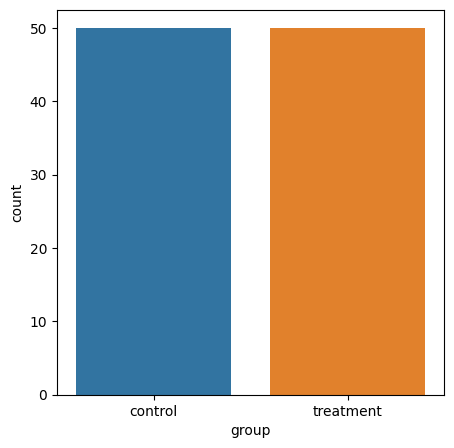

In [13]:
#Visual analysis for the group types
plt.figure(figsize=(5,5))
sns.countplot(data = df, x = 'group',hue = 'group')
plt.show()

* As mentioned in the problem statement, there are 2 groups:
1.     The existing landing page (control group) and
2.     The new landing page      (treatment group).
* In a sample of 100 users, the two groups were divided equally into 50 users each

#Landing page

In [14]:
#value count for the types of group
df['landing_page'].value_counts()

landing_page
old    50
new    50
Name: count, dtype: int64

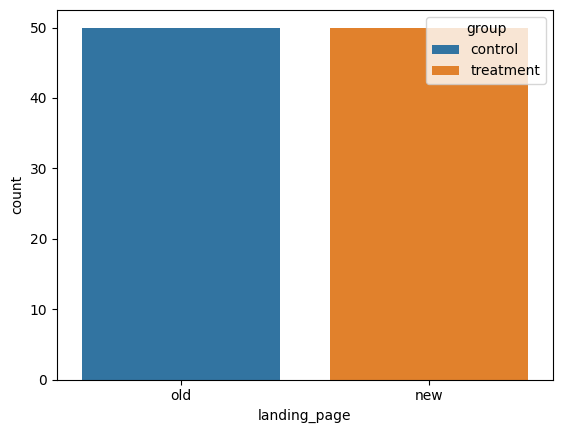

In [15]:
#visual analysis for the landing_page
sns.countplot(data = df, x = 'landing_page',hue = 'group')
plt.show()

* There are 2 unique landing pages; old and new.
* Each landing page has 50 users

#Time spent on the page

In [16]:
#Vizual analysis for the time spent on the page
df['time_spent_on_the_page'].value_counts()

time_spent_on_the_page
6.04    2
4.75    2
7.16    2
3.88    2
5.86    2
       ..
3.52    1
5.41    1
4.28    1
7.81    1
6.20    1
Name: count, Length: 94, dtype: int64

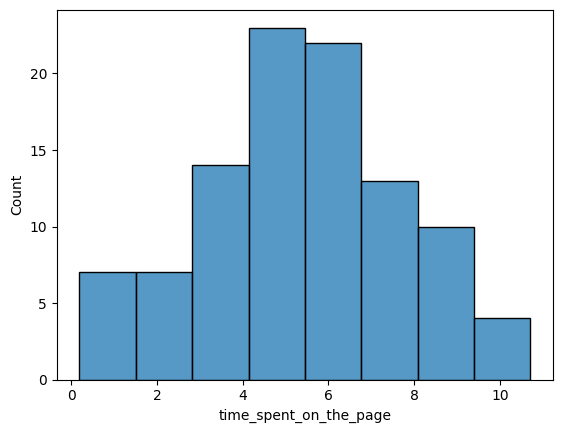

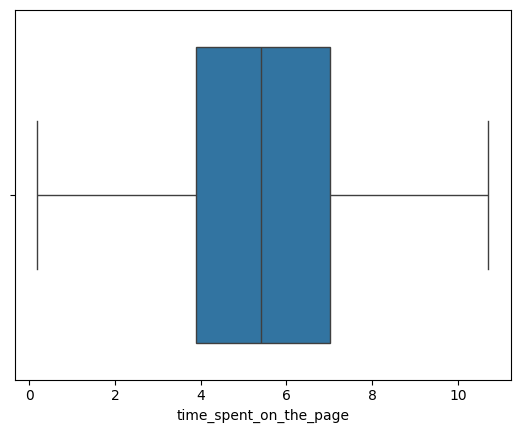

In [17]:
#Vizual analysis for the time spent on the page
sns.histplot(data=df,x='time_spent_on_the_page')
plt.show()
sns.boxplot(data=df,x='time_spent_on_the_page')
plt.show()

* Time spent per page follows a normal distribution with the maximum time at about 10.7 minutes and average time of 5.4 minutes while the minimum time spent was 0.19 seconds


#Converted

In [18]:
#value count for converted
df['converted'].value_counts()

converted
yes    54
no     46
Name: count, dtype: int64

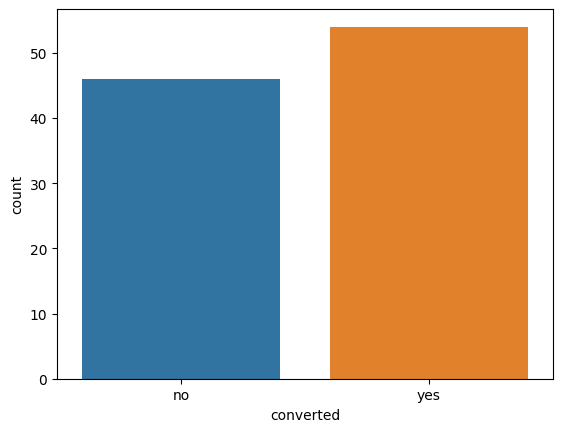

In [19]:
#Vizual analysis for the converted
sns.countplot(data=df,x='converted', hue = 'converted')
plt.show()


* There are 2 unique conversion status; Yes( with 54 users)  and No ( with 46 users).


#Language Preferred

In [20]:
df['language_preferred'].value_counts()

language_preferred
Spanish    34
French     34
English    32
Name: count, dtype: int64

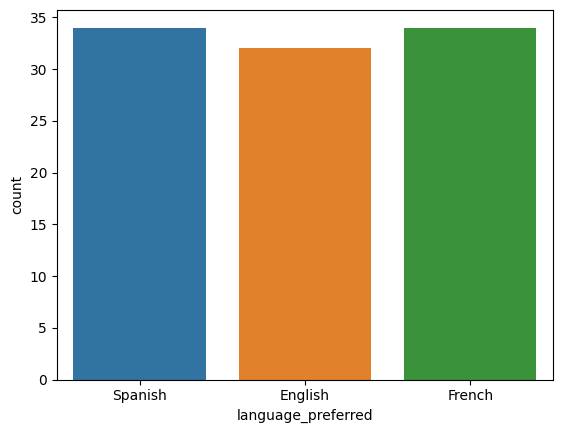

In [21]:
sns.countplot(data=df,x='language_preferred', hue = 'language_preferred')
plt.show()

* There are 3 unique languages;
  1. Spanish with 34 users
  2. French with 34 users and
  3. English with 32 users

#Bivariate Analysis

Converted Vs Time spent on the page

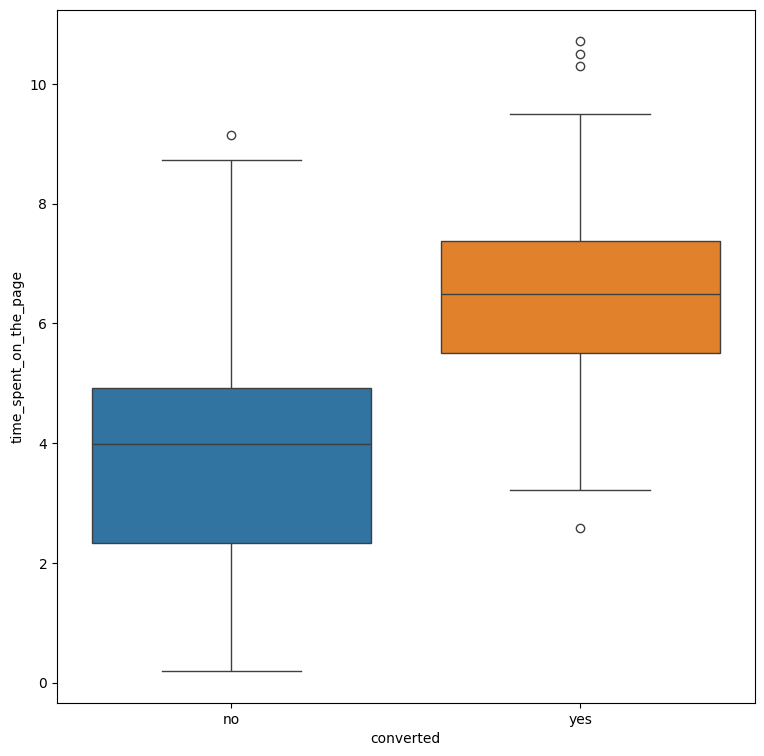

In [28]:
# understanding the relationship between 'time_spent_on_the_page' and 'converted' columns
plt.figure(figsize=(9, 9))
sns.boxplot(data = df, x = 'converted', y = 'time_spent_on_the_page', hue = 'converted')
plt.show()

Observation: The average number of user that gets converted to a subscriber of the news portal is higher than those that do not

Landing page Vs Time spent on the page

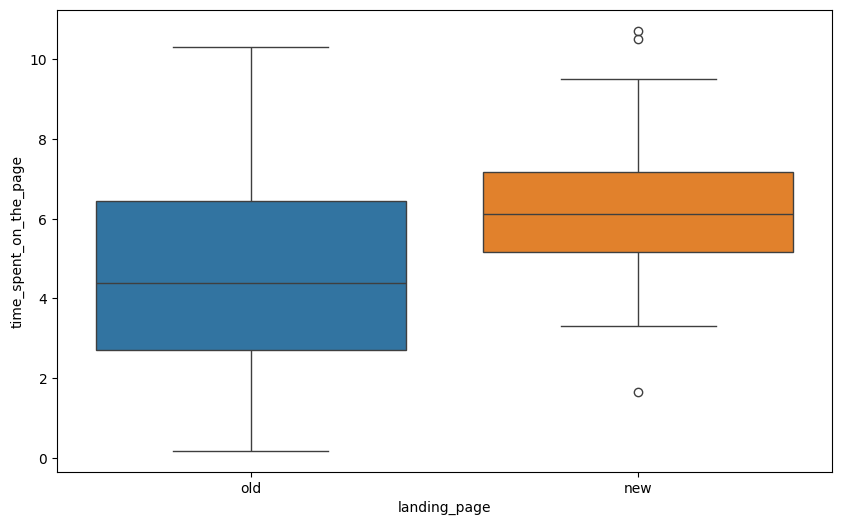

In [23]:
# understanding the relationship between 'time_spent_on_the_page' and 'Landing page' columns
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page',hue ='landing_page');
plt.show()

Observation: *There is high variability in the number of users who visit the landing page
*The average mean of users on the new landing page is higher than those on the old landing page



Language Preferred Vs Time spent on the page

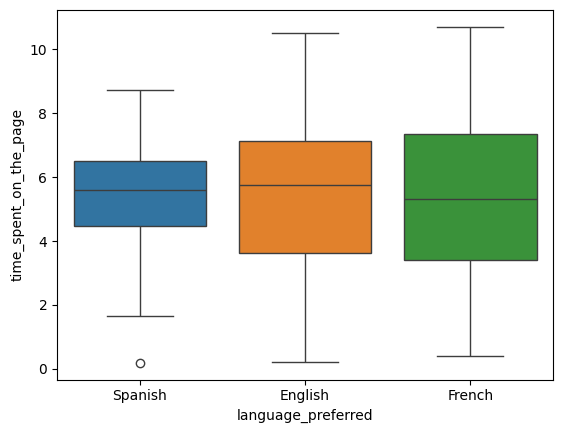

In [24]:
# understanding the relationship between 'Preferred language' and 'converted' columns
#plt.figure(figsize=(9, 5))
sns.boxplot(data = df,  x = 'language_preferred', y = 'time_spent_on_the_page', hue =  'language_preferred')
plt.show()

* The distribution of time spent on the page seems similar among the three languages.
* The average time spent on each page seems to be very close for the three languages with English having higher variation
* Further statistical test is needed to provide evidence for this variation


## 1. Do the users spend more time on the new landing page than the existing landing page?

In [25]:
round(df.groupby(df['landing_page'])['time_spent_on_the_page'].mean(), 2)

landing_page
new    6.22
old    4.53
Name: time_spent_on_the_page, dtype: float64

### Perform Visual Analysis

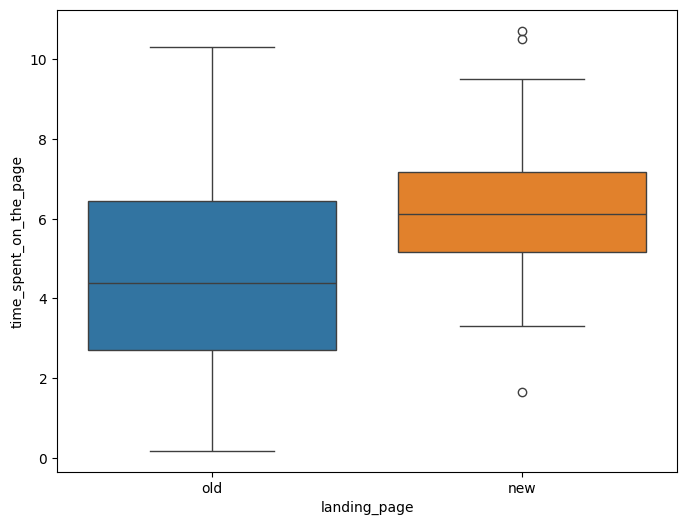

In [26]:
# visual analysis of the time spent on the new page and the time spent on the old page
plt.figure(figsize=(8,6))
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = df, hue = 'landing_page')
plt.show()

* The average time spent on the new landing page is higher than the new landing page

### Step 1: Define the null and alternate hypotheses

$H_0$: The average time spent on the new landng page is equal to the average time spent on the old landing page

$H_a$: The average time spent on the new landing page is greater than the old landing page

### Step 2: Select Appropriate test

* This is a one-tailed test concerning two population means from two independent populations.
* The population standard deviations are unknown.
* Based on this information, the Test for comparing means(unknown Var) : T-test is the appropriate test.

### Step 3: Decide the significance level

* As given in the problem statement, we select  α=0.05

### Step 4: Collect and prepare data

In [29]:
# create subsetted data frame for new landing page users
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']

# create subsetted data frame for old landing page users
time_spent_old = df[df['landing_page'] == 'old']['time_spent_on_the_page']

In [34]:
# find the sample means and sample standard deviations for the two samples
print('The sample mean of the time spent on the new page is:', round(time_spent_new.mean(),2))
print('The sample mean of the time spent on the new page is:',round(time_spent_old.mean(),2))
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_new.std(),2))
print('The sample standard deviation of the time spent on the old page is:', round(time_spent_old.std(),2))

The sample mean of the time spent on the new page is: 6.22
The sample mean of the time spent on the new page is: 4.53
The sample standard deviation of the time spent on the new page is: 1.82
The sample standard deviation of the time spent on the old page is: 2.58


Based on the sample standard deviations of the two groups, the population standard deviations can be assumed to be unequal.

### Let's test whether the T-test assumptions are satisfied or not

* Continuous data - Yes, the time spent on the page is measured on a continuous scale.
* Normally distributed populations - Yes,the distribution of time spent on the landing page assumes the population to be normal.
* Independent populations - As we are taking random samples for two different groups, the two samples are from two independent populations.
* Unequal population standard deviations - As the sample standard deviations are different, the population standard deviations is therefore assumed to be different.
* Random sampling from the population - Yes, we are informed that the 100 users were a simple random sample.

Hence, I can use two sample T-test for this problem.

### Step 5: Calculate the p-value

In [35]:
from scipy.stats import ttest_ind

# calculate the p-value
test_stat, p_value = ttest_ind(time_spent_new, time_spent_old, equal_var = False, alternative = 'greater')
print('The p-value is', p_value)

The p-value is 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [36]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

As the p-value (~0.00014) is less than the level of significance, we can reject the null hypothesis. Hence, we do have enough evidence to support the claim that the average time spent on new landing page is greater than the average time spent on the old landing page

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

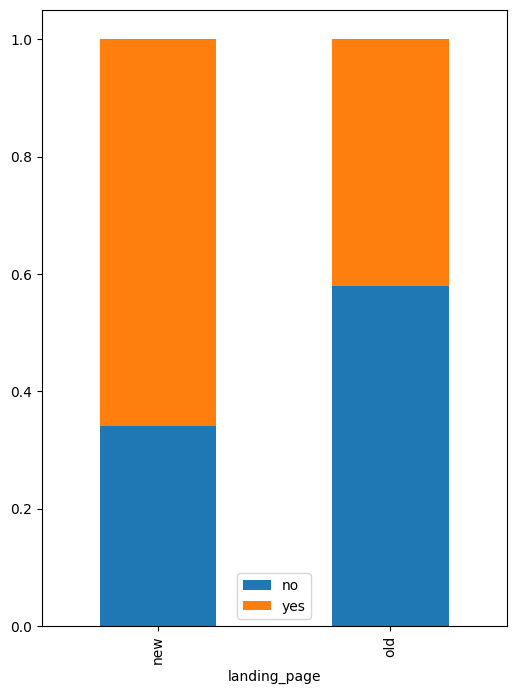

In [40]:
# code to visually compare the conversion rate for the new page and the conversion rate for the old page
pd.crosstab(df['landing_page'], df['converted'],normalize='index').plot(kind="bar", figsize=(6,8),stacked=True)
plt.legend()
plt.show()

Observation: Conversation status for the new landing status is higher compared to old one

###Step 1 : Define the Hypothesis

$H_0$: The proportion of users who visit the landing page and get converted for the new page is equal to the conversion rate for the old page

$H_a$ : The proportion of users who visit the landing page and get converted for the new page is greater than the conversion rate for the old page

###Step 2 :Select Appropriate Test

This is a one-tailed test concerning two population proportions from two independent populations. Based on this information, Two Proportion Z-test is the appropriate test.

###Step 3: Decide the appropriate significance level

* As given in the problem statement, we select  α=0.05

###Step 4: Collect and Prepare Data

In [46]:
# calculate the number of converted users in the treatment group
new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
# calculate the number of converted users in the control group
old_converted = df[df['group'] =='control']['converted'].value_counts()['yes']

# total number of users in the control group
n_control = df.group.value_counts()['control']
# total number of users in the treatment group
n_treatment = df.group.value_counts()['treatment']

print('The numbers of users served the new and old pages are {0} and {1} respectively'.format(n_control, n_treatment ))

The numbers of users served the new and old pages are 50 and 50 respectively


###Step 5: Calculate p value

In [45]:
from statsmodels.stats.proportion import proportions_ztest

# code to calculate the p-value
test_stat, p_value = proportions_ztest([new_converted, old_converted] , [n_treatment, n_control], alternative ='larger')


print('The p-value is', p_value)

The p-value is 0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

In [47]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference


As the p-value is less than the significance level 0.05, we reject the null hypothesis. Thus, we have enough statistical significance to conclude that the proportion of users who visit the landing page and get converted for the new page is greater to the conversion rate for the old page


## 3. Is the conversion and preferred language are independent or related?

### Perform Visual Analysis

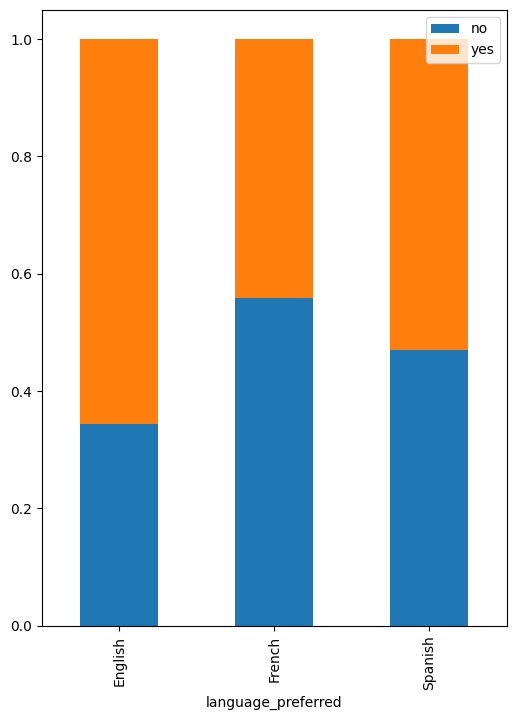

In [48]:
#code to visually plot the dependency between conversion status and preferred langauge
pd.crosstab(df['language_preferred'], df['converted'],normalize='index').plot(kind="bar", figsize=(6,8),stacked=True)
plt.legend()
plt.show()

* The proportion of conversion is higher in the french language preferencethan the other two languages.
* Based on the sample data, we can infer that the proportion of conversion is higher for one language, but is this difference significant enough to conclude that conversion status is dependent on the language preference?

### Step 1: Define the null and alternative hypothesis

$H_0:$ conversion status is independent on the language preference

$H_a:$ conversion status is dependent on the language preference

###Step 2: Select appropriate test

This is a problem of the test of independence, concerning two categorical variables - converted status and preferred language.

* Based on this information, the Chi Square test is the appropriate test.

###Step 3: Decide the Significance level

* As given in the problem statement, we select α = 0.05.

###Step 4: Collect and Prepare Data

In [50]:
# complete the code to create a contingency table showing the distribution of the two categorical variables
contingency_table = pd.crosstab(df['language_preferred'], df['converted'])

contingency_table

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


###Step 5: Calculate the p value

In [51]:
#  code to import the required function
from scipy.stats import  chi2_contingency

# write the code to calculate the p-value
chi2, p_value, dof, exp_freq =  chi2_contingency(contingency_table)

print('The p-value is', p_value)

The p-value is 0.2129888748754345


###Step 6: Compare the p value with  $\alpha$

In [52]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.2129888748754345 is greater than the level of significance, we fail to reject the null hypothesis.


###Step 7: Inference

As the p-value is greater than the significance level, we fail to reject the null hypothesis. Hence, we have enough statistical significance to conclude that conversion status is independent on the language preference

## 4. Is the time spent on the new page same for the different language users?

###Perform Visual Analysis

In [53]:
# create a new DataFrame for users who got served the new page
df_new = df[df['landing_page'] == 'new']

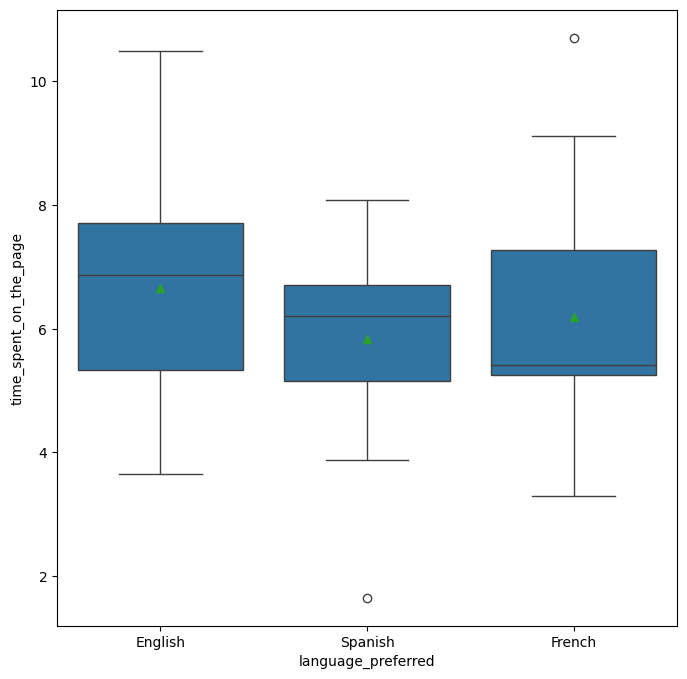

In [58]:
# code to visually plot the time spent on the new page for different language users
plt.figure(figsize=(8,8))
sns.boxplot(x = 'language_preferred', y = 'time_spent_on_the_page', showmeans = True, data = df_new)
plt.show()


* The English users have the most average time spent on the page , followed by Spanish and french being the least,

* can we then say, the time spent on the new page is same for the different language users?, Not yet!

###Step 1 : Define the null and alternative Hypothesis

$H_0:$  The mean time spent on the page  with respect to each language category is equal.

$H_a:$ At least the mean time spent on new landing page for one level is different from the rest.

Let's test whether the assumptions are satisfied or not

The normality and equality of variance assumptions need to be checked.

For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

For equality of variance, Levene test is applied to the response variable.

**Shapiro-Wilk’s test**

We will test the null hypothesis

>$H_0:$ The time spent on the page follow a normal distribution

against the alternative hypothesis

>$H_a:$ The time spent on the page do not not follow a normal distribution

In [61]:
# Assumption 1: Normality
# Use the shapiro function for the scipy.stats library for this test
import scipy.stats as stats

# find the p-value
w, p__value = stats.shapiro(df_new['time_spent_on_the_page'])
print('The p-value is', p__value)

The p-value is 0.8040016293525696


Since p-value of the test is very large than the 5% significance level, we fail to reject the null hypothesis that the response follows the normal distribution.

**Levene’s test**

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [62]:
#Assumption 2: Homogeneity of Variance
# use levene function from scipy.stats library for this test

# write the code to calculate the p-value
test_stat, p_value = stats.levene(time_spent_English, time_spent_French, time_spent_Spanish)
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is large than the 5% significance level, we fail to reject the null hypothesis of homogeneity of variances.

###Step 2: Select appropriate test

This is a problem, concerning three population means. Based on this information, the One-way Anova test will be appropriate test to compare the three population means.

In a one-way ANOVA test, we compare the means from several populations to test if there is any significance difference between them. The results from an ANOVA test are most reliable when the assumptions of normality and equality of variances are satisfied.

For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

For equality of variance, Levene test is applied to the response variable.

###Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

###Step 4: Collect and prepare data



In [59]:
# create a subsetted data frame of the time spent on the new page by English language users
time_spent_English = df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page']
# create subsetted data frames of the time spent on the new page by French and Spanish language users
time_spent_French = df_new[df_new['language_preferred']=="French"]['time_spent_on_the_page']
time_spent_Spanish = df_new[df_new['language_preferred']=="Spanish"]['time_spent_on_the_page']

###Step 5 : Calculate the p-value

In [63]:
# perform one-way anova test using the f_oneway function from scipy.stats library
test_stat, p_value = stats.f_oneway(time_spent_English,time_spent_French, time_spent_Spanish)
print('The p-value is ', p_value)

The p-value is  0.43204138694325955


###Step 6: Compare the p-value and signicance level

In [64]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


###Step 7: Inference


Since the p-value is greater than the level of significance (5%), we fail to reject the null hypothesis. Hence, we have enough statistical evidence to say that the mean time spent on the page with respect to each language category is equal

## Conclusion and Business Recommendations



* From the sample data, it was observed that the language category does not have any effect on the time spent on the landing page and the  convertion status of users


* the average time spent on new landing page is greater than the average time spent on the old landing page


* There was enough statistical evidence to say that the proportion of users who visit the landing page and get converted for the new page is greater to the conversion rate for the old page



* As a business, it is recommended to optimize the new landing page for more conversion and customer base reach


___

In [65]:
!pwd

/content


In [ ]:
#%%shell
#jupyter nbconvert --to html //'/content/PYF_Project_LearnerNotebook_FullCode_Ifeoluwa.ipynb'